# Minimum Edit Distance 
## BDA492 - Assignment 3

In this assignment, we implement a popular method to measure the dissimilarities between two strings based on counting the number of operations required to transfer one string into the other string. Methods like these are used in applications like:



* **Spell correction:** The user typed “graffe”, which is the closest word to it: graf/graft/grail/giraffe

* **Computational Biology:** Align two sequences of nucleotides: 

            {AGGCTATCACCTGACCTCCAGGCCGATGCCC} 

            {TAGCTATCACGACCGCGGTCGATTTGCCCGAC}


* Also for **Machine Translation**, **Information Extraction**, **Speech Recognition**


The 3 operations used are the following:
* Insertion
* Deletion
* Substitution

There are many ways of scoring the operations. In the case of Levenshtein Distance (the one we'll be following here), has 1-point for Insertion/Deletion and 2-points for Substitution (intuitively, since a substitution is 1 deletion + 1 insertion).

**Example:** 

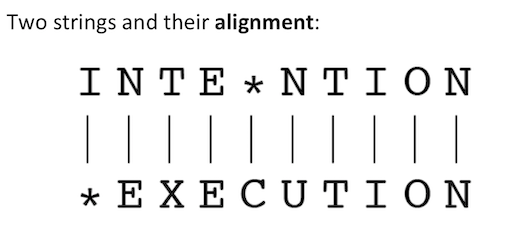

In [3]:
import numpy as np

In [57]:
def edit_dist (X,Y):
    M = len(X)
    N = len(Y)
    k = M
    l = N
    a,b = M,N
    oper = []
    ptr = np.zeros((M+1,N+1))
    D = np.zeros((M+1,N+1))
    D[0,:] = list(range(N+1))
    D[:,0] = list(range(M+1))
    for i in range(1,M+1):
        for j in range(1,N+1):
            if(X[i-1]==Y[j-1]):
                arr = [D[i-1,j]+1,D[i,j-1]+1,D[i-1,j-1]]  #deletion, insertion & substitution resp.
            else: 
                arr = [D[i-1,j]+1,D[i,j-1]+1,D[i-1,j-1]+2] #cost for substitution '0' for same char. and '2' for diff. char.
            Q = min(arr)
            D[i,j] = Q
            if(arr == [Q,Q,Q] or (arr[2]==Q and arr[1]==Q and arr[0]!=Q) or (arr[2]==Q and arr[1]!=Q and arr[0]==Q)):
                ptr[i,j] = 3
            else:
                ptr[i,j] = arr.index(Q)+1  #'1' for deletion; '2' for insertion; '3' for substitution
                
    #Finding operations corresponding to every step (Backtracing)
    while(ptr[k,l]!=0):
        if(ptr[k,l]==3 and X[k-1]==Y[l-1]):
            oper.append(0) #no change
            k=k-1
            l=l-1
        elif(ptr[k,l]==3 and X[k-1]!=Y[l-1]):
            oper.append(3) #substitution
            k=k-1
            l=l-1
        elif(ptr[k,l]==1):
            oper.append(1) #deletion
            k=k-1
        elif(ptr[k,l]==2):
            oper.append(2) #insertion
            l=l-1
            
    #when the pointer doesn't reach [0,0]
    while(k!=0):  
        oper.append(1) #deletion
        k=k-1
    while(l!=0):
        oper.append(2) #insertion
        l=l-1
    
    for p in oper:
        if(oper == 0): #'no change'
            print(X[a],'----No Change---->',Y[b])
            a = a-1
            b=b-1
        elif(oper == 1): #'delete'
            print(X[a],'----Delete---->','*')
            a = a-1
        elif(oper == 2): #'insert'
            print('*','<----Insert----',Y[b])
            b = b-1
        elif(oper == 3): #'substitute'
            print(X[a],'<----Substitute---->',Y[b])
            a = a-1
            b=b-1
    return D[M,N]
    

In [58]:
X = "AGASTYA"
Y = "SUCHIT"
d = edit_dist(X,Y)
